# Tiesinė regresija su Python: paprasta regresija, interpretacija ir diagnostika

Šiame faile pateikiamas nuoseklus pavyzdys, kaip atlikti **paprastą tiesinę regresiją** (vienas paaiškinamasis kintamasis),
kaip interpretuoti modelį ir kaip įvertinti rezultatų patikimumą.

Naudojamas paprastas verslo scenarijus: reklamos biudžetas ir pardavimai.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

np.random.seed(7)

## 1) Duomenys: reklamos biudžetas ir pardavimai

Duomenys imituoja situaciją, kur didesnis reklamos biudžetas dažniausiai susijęs su didesniais pardavimais,
bet ryšys nėra idealus (visada yra triukšmo).

Kintamieji:
- `ad_spend_k` – reklamos biudžetas (tūkst. Eur)
- `sales_k` – pardavimai (tūkst. Eur)


In [3]:
ad_spend_k = np.array([5, 7, 8, 10, 12, 13, 15, 18, 20, 22, 25, 28, 30, 35, 40], dtype=float)

# Pardavimai su triukšmu: bazė + 1.8 * biudžetas + atsitiktinis triukšmas
noise = np.random.normal(loc=0, scale=4, size=ad_spend_k.size)
sales_k = 20 + 1.8 * ad_spend_k + noise

df = pd.DataFrame({"ad_spend_k": ad_spend_k, "sales_k": sales_k})
df.head()

,ad_spend_k,sales_k
0,5.0,35.762103
1,7.0,30.736251
2,8.0,34.531281
3,10.0,39.630065
4,12.0,38.444308


Atsitiktinis triukšmas (random noise)

Atsitiktinis triukšmas reiškia visą įtaką, kurios regresijos modelis nepaaiškina.  
Tai skirtumas tarp realios reikšmės ir modelio prognozės.

Formaliai:
triukšmas = y − ŷ

Verslo prasme:
Net ir didėjant reklamos biudžetui, pardavimai svyruoja dėl veiksnių, kurie nėra įtraukti į modelį
(sezoniškumo, akcijų, konkurencijos, klientų elgsenos, atsitiktinių įvykių).

Triukšmas parodo, kad:
duomenys nėra idealiai tiesiniai  
realybė nėra pilnai prognozuojama  

Triukšmas nėra klaida ir nėra blogas dalykas.
Tai signalas apie neapibrėžtumą ir riziką.

Geroji praktika:
tikrinti likučių (residuals) grafiką  
jei triukšmas turi struktūrą, modelis greičiausiai nepakankamas


### Pirminė vizualizacija

Sklaidos diagrama leidžia įvertinti, ar ryšys panašus į tiesinį.


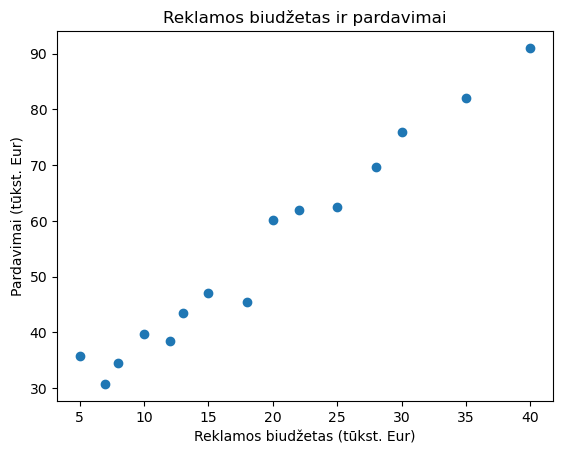

In [4]:
plt.figure()
plt.scatter(df["ad_spend_k"], df["sales_k"])
plt.xlabel("Reklamos biudžetas (tūkst. Eur)")
plt.ylabel("Pardavimai (tūkst. Eur)")
plt.title("Reklamos biudžetas ir pardavimai")
plt.show()

## 2) Paprasta tiesinė regresija (Simple Linear Regression)

Modelio forma:
- y = β0 + β1 x + ε

Kur:
- β0 – laisvasis narys (intercept)
- β1 – nuolydis (slope)
- ε – paklaida (triukšmas)


## 3) Mažiausių kvadratų metodas (Least Squares) ir klaida

Mažiausių kvadratų metodas parenka β0 ir β1 taip, kad suma
Σ (y_i - ŷ_i)² būtų minimali.

Kvadratinė klaida naudojama todėl, kad:
- teigiamas ir neigiamas nuokrypis nesusinaikina,
- didesnės klaidos yra labiau „baudžiamos“.


## 4) Regresija su `statsmodels`

`statsmodels` pateikia suvestinę: koeficientus, standartines paklaidas,
t-testus, F-testą, p-reikšmes ir diagnostiką.

Svarbi detalė: norint įtraukti intercept, reikia pridėti konstantą.


In [5]:
X = sm.add_constant(df["ad_spend_k"])   # pridedamas intercept
y = df["sales_k"]

model = sm.OLS(y, X).fit()
model.summary()

c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sales_k   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     444.4
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           1.95e-11
Time:                        15:24:48   Log-Likelihood:                -38.134
No. Observations:                  15   AIC:                             80.27
Df Residuals:                      13   BIC:                             81.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0018      1.805     11.633      0.000      17.102      24.902
ad_spend_k     1.7471      0.083     21.080      0.000       1.568       1.926
==============================================================================
Omnibus:                        1.193   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                0.177
Skew:                          -0.224   Prob(JB):                        0.915
Kurtosis:                       3.288   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mažiausių kvadratų metodas (Least Squares)

Mažiausių kvadratų metodas yra būdas rasti tokią regresijos liniją, kuri geriausiai atitinka duomenis.

Metodo idėja:
modelis parenkamas taip, kad kvadratinių likučių suma būtų kuo mažesnė.

Likutis:
likutis = reali reikšmė − prognozuota reikšmė

Kvadratinė klaida:
(real − prognozė)²

Kvadratai naudojami todėl, kad:
teigiami ir neigiami nuokrypiai nesusinaikina  
didelės klaidos turi didesnę įtaką nei mažos  

Verslo interpretacija:
modelis bando „vidutiniškai klysti kuo mažiau“
didelės prognozavimo klaidos yra labiau baudžiamos

Svarbi pastaba:
least squares negarantuoja tobulo modelio
jis garantuoja tik geriausią tiesinį sprendimą pagal pasirinktus duomenis


## 5) Modelio interpretavimas

Pagrindinės modelio dalys:
- **Intercept (const)**: prognozuojami pardavimai, kai reklamos biudžetas lygus 0.
- **ad_spend_k koeficientas**: kiek vidutiniškai pasikeičia pardavimai, padidinus biudžetą 1 tūkst. Eur.

Svarbu atskirti:
- statistinį reikšmingumą (p-value)
- praktinį reikšmingumą (ar efektas verslui pakankamai didelis).


In [6]:
params = model.params
conf = model.conf_int()
pd.DataFrame({
    "coef": params,
    "ci_low": conf[0],
    "ci_high": conf[1]
})

,coef,ci_low,ci_high
const,21.001803,17.101517,24.902089
ad_spend_k,1.747056,1.568011,1.926102


model.params yra modelio objekto atributas, kuriame saugomi koeficientų įverčiai.

Matome regresijos koeficientus ir jų pasitikėjimo intervalus.

const  
Laisvasis narys (intercept).  
Kai reklamos biudžetas lygus 0, modelis prognozuoja apie 21 tūkst. Eur pardavimų.

ci_low = 17.10, ci_high = 24.90  
95 % pasitikėjimo intervalas interceptui.
Tai reiškia, kad tikėtina, jog tikrasis bazinių pardavimų lygis yra šiame intervale.

ad_spend_k  
Nuolydis (slope).  
Padidinus reklamos biudžetą 1 tūkst. Eur, pardavimai vidutiniškai padidėja apie 1.75 tūkst. Eur.

ci_low = 1.57, ci_high = 1.93  
95 % pasitikėjimo intervalas nuolydžiui.
Intervalas neapima 0, todėl reklamos biudžeto poveikis laikomas statistiškai reikšmingu.

Verslo interpretacija:
reklamos biudžetas turi stabilų ir teigiamą ryšį su pardavimais  
net pesimistiškiausiu atveju papildomas 1 000 Eur reklamos biudžetas siejamas su augimu  

Geroji praktika:
interpretuoti koeficientus kartu su pasitikėjimo intervalais, o ne vien su p-value


## 6) Prognozės (Making predictions)

Modelis gali būti naudojamas:
- prognozuoti pardavimus pagal naują biudžetą,
- gauti pasitikėjimo intervalus vidurkiui ir prognozės intervalus naujai reikšmei.

Toliau pateikiamas pavyzdys kelioms naujoms biudžeto reikšmėms.


In [7]:
new_ad_spend = pd.DataFrame({"ad_spend_k": [6, 14, 26, 38]})
new_X = sm.add_constant(new_ad_spend)

pred = model.get_prediction(new_X).summary_frame(alpha=0.05)
result_pred = pd.concat([new_ad_spend, pred], axis=1)
result_pred

,ad_spend_k,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6,31.484142,1.387131,28.487426,34.480857,23.744631,39.223653
1,14,45.460593,0.955547,43.396259,47.524928,38.032188,52.888999
2,26,66.425271,1.022227,64.216883,68.633658,58.955552,73.894990
3,38,87.389948,1.776230,83.552636,91.227260,79.287807,95.492089


### Prognozių interpretacija

Modelis pateikia prognozuojamas reikšmes skirtingiems reklamos biudžeto (ad_spend_k) lygiams.

mean – prognozuojamas vidurkis esant tam biudžetui  
mean_ci_lower / mean_ci_upper – 95 % pasikliautinas intervalas tikram vidurkiui  
obs_ci_lower / obs_ci_upper – 95 % intervalas individualiai naujai reikšmei (platesnis nei vidurkio intervalas)

Kai ad_spend_k = 6  
Prognozuojamas vidurkis ≈ 31.48  
95 % CI vidurkiui: [28.49 ; 34.48]  
95 % individualiai reikšmei: [23.74 ; 39.22]

Kai ad_spend_k = 14  
Prognozuojamas vidurkis ≈ 45.46  
95 % CI vidurkiui: [43.40 ; 47.52]  
95 % individualiai reikšmei: [38.03 ; 52.89]

Kai ad_spend_k = 26  
Prognozuojamas vidurkis ≈ 66.43  
95 % CI vidurkiui: [64.22 ; 68.63]  
95 % individualiai reikšmei: [58.96 ; 73.89]

Kai ad_spend_k = 38  
Prognozuojamas vidurkis ≈ 87.39  
95 % CI vidurkiui: [83.55 ; 91.23]  
95 % individualiai reikšmei: [79.29 ; 95.49]

Išvada: didėjant reklamos biudžetui, prognozuojama rezultato reikšmė didėja. Vidurkio intervalai yra siauresni nei individualios prognozės intervalai.


### Vizualizacija: regresijos tiesė ir duomenys

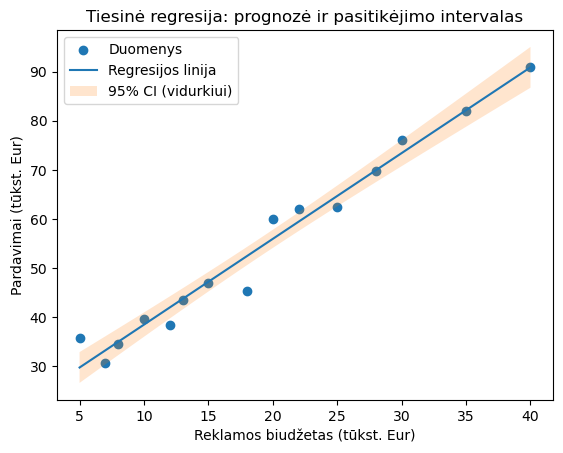

In [7]:
# Prognozė visame x diapazone
x_grid = np.linspace(df["ad_spend_k"].min(), df["ad_spend_k"].max(), 200)
grid_X = sm.add_constant(pd.Series(x_grid, name="ad_spend_k"))
grid_pred = model.get_prediction(grid_X).summary_frame(alpha=0.05)

plt.figure()
plt.scatter(df["ad_spend_k"], df["sales_k"], label="Duomenys")
plt.plot(x_grid, grid_pred["mean"], label="Regresijos linija")
plt.fill_between(x_grid, grid_pred["mean_ci_lower"], grid_pred["mean_ci_upper"], alpha=0.2, label="95% CI (vidurkiui)")
plt.xlabel("Reklamos biudžetas (tūkst. Eur)")
plt.ylabel("Pardavimai (tūkst. Eur)")
plt.title("Tiesinė regresija: prognozė ir pasitikėjimo intervalas")
plt.legend()
plt.show()

## 7) R-squared (R²) ir jo prasmė

R² parodo, kokią dalį `y` variacijos paaiškina modelis.

Interpretacija:
- 0 reiškia, kad modelis nepaaiškina variacijos geriau nei vidurkis
- 1 reiškia, kad modelis paaiškina viską

Svarbi pastaba: aukštas R² nebūtinai reiškia gerą modelį (gali būti netinkama specifikacija ar prielaidos).


In [8]:
model.rsquared

0.9715765393721252

## 8) Hipotezės, reikšmingumo lygis ir p-reikšmė

Dažniausiai tikrinama, ar nuolydis yra nelygus nuliui.

Hipotezės:
- H0: β1 = 0 (ryšio nėra)
- H1: β1 ≠ 0 (ryšys yra)

Reikšmingumo lygis (alpha):
- dažniausiai 0.05

Sprendimo taisyklė:
- jei p-value < alpha, H0 atmetama
- jei p-value ≥ alpha, nėra pagrindo atmesti H0


In [9]:
alpha = 0.05
p_slope = model.pvalues["ad_spend_k"]
t_slope = model.tvalues["ad_spend_k"]

alpha, t_slope, p_slope

(0.05, 21.080053521851056, 1.9540826833866283e-11)

### Išvada apie hipotezės testą (nuolydis)

Išvada formuluojama pagal pasirinktą alpha ir p-reikšmę.


In [10]:
conclusion = "H0 atmetama: nuolydis statistiškai reikšmingas." if p_slope < alpha else "Nėra pagrindo atmesti H0: nuolydis statistiškai nereikšmingas."
conclusion

'H0 atmetama: nuolydis statistiškai reikšmingas.'

## 9) F-statistika ir p-reikšmė (modelio reikšmingumas)

Paprastoje tiesinėje regresijoje F-testas atsako į klausimą, ar modelis su `x` paaiškina `y` geriau nei modelis be `x`.

Hipotezės:
- H0: visi paaiškinamųjų kintamųjų koeficientai (išskyrus intercept) lygūs 0
- H1: bent vienas koeficientas nelygus 0

Paprastos regresijos atveju F-testas ir nuolydžio t-testas yra susiję (F ≈ t²).


In [11]:
f_stat = model.fvalue
f_pval = model.f_pvalue

f_stat, f_pval, t_slope**2

(444.3686564841057, 1.954082683386615e-11, 444.3686564841051)

Šis rezultatas vertina viso regresijos modelio reikšmingumą.

f_stat = 444.37  
F-statistika. Ji parodo, kiek modelis su reklamos biudžetu paaiškina pardavimus geriau nei modelis be jokio paaiškinamojo kintamojo.
Labai didelė reikšmė reiškia, kad modelis yra labai stiprus.

f_pval = 1.95e-11  
F-testo p-reikšmė. Tai tikimybė gauti tokį stiprų modelį atsitiktinai, jei reklamos biudžetas neturėtų jokio poveikio.
Reikšmė praktiškai lygi nuliui.

t_slope² = 444.37  
Nuolydžio t-statistikos kvadratas.
Paprastoje tiesinėje regresijoje galioja ryšys: F = t².
Tai reiškia, kad:
viso modelio F-testas ir nuolydžio t-testas tikrina tą patį efektą.

Sprendimas:
kadangi F p-value << alpha, modelis statistiškai reikšmingas.

Išvada verslo prasme:
modelis su reklamos biudžetu paaiškina pardavimus gerokai geriau nei paprastas vidurkis.
Reklamos biudžetas nėra „atsitiktinis triukšmas“, o realiai susijęs su pajamomis.


## 10) Likučiai (residuals) ir jų diagnostika

Likutis:
- e_i = y_i - ŷ_i

Likučių analizė padeda įvertinti prielaidas:
- tiesiškumą
- pastovią dispersiją (homoskedastiškumą)
- apytikrį normalumą (naudinga intervalams ir testams)
- galimas išskirtis ir įtakos taškus


In [13]:
df["y_hat"] = model.fittedvalues
df["residual"] = model.resid
df.head()

,ad_spend_k,sales_k,y_hat,residual
0,5.0,35.762103,29.737085,6.025017
1,7.0,30.736251,33.231198,-2.494948
2,8.0,34.531281,34.978255,-0.446974
3,10.0,39.630065,38.472368,1.157698
4,12.0,38.444308,41.966480,-3.522173


** Kaip regresijos modelis „skaido“ pardavimus į prognozuotą dalį ir likutį. **

ad_spend_k  
Reklamos biudžetas (tūkst. Eur). Tai paaiškinamasis kintamasis.

sales_k  
Faktiniai pardavimai (tūkst. Eur). Tai realūs stebėti duomenys.

y_hat  
Modelio prognozuoti pardavimai pagal tiesinę regresiją.
Tai reikšmė, kurią modelis „tikisi“ matyti esant konkrečiam biudžetui.

residual  
Likutis (klaida). Skirtumas tarp realių ir prognozuotų pardavimų.
residual = sales_k − y_hat

Interpretacija:
teigiamas likutis reiškia, kad realūs pardavimai buvo didesni nei prognozavo modelis  
neigiamas likutis reiškia, kad realūs pardavimai buvo mažesni nei prognozavo modelis  

Verslo prasme:
likučiai parodo veiksnius, kurių modelis nepaaiškina
(akcijos, sezoniškumas, konkurencija, atsitiktiniai įvykiai).

Jei likučiai atrodo atsitiktiniai ir sukasi aplink nulį,
modelis laikomas tinkamu aprašyti pagrindinę tendenciją.


### Likučių grafikas: residuals vs fitted

Toks grafikas turėtų rodyti atsitiktinį „debesį“ aplink 0.
Jei matoma aiški forma (pvz., kreivė), gali būti, kad ryšys nėra tiesinis.
Jei sklaida didėja mažėjant ar didėjant prognozei, gali būti heteroskedastiškumas.


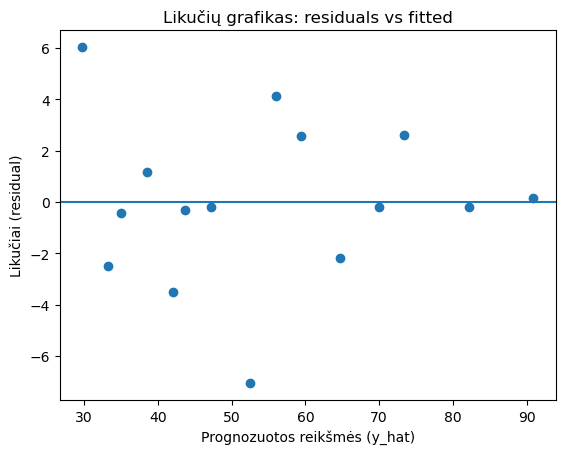

In [14]:
plt.figure()
plt.scatter(df["y_hat"], df["residual"])
plt.axhline(0)
plt.xlabel("Prognozuotos reikšmės (y_hat)")
plt.ylabel("Likučiai (residual)")
plt.title("Likučių grafikas: residuals vs fitted")
plt.show()

### Normalumo patikra: Q-Q grafikas

Q-Q grafikas lygina likučių kvantilius su teorinio normaliojo skirstinio kvantiliais.
Jeigu taškai daugmaž gula ant tiesės, normalumo prielaida yra pakankamai pagrįsta.


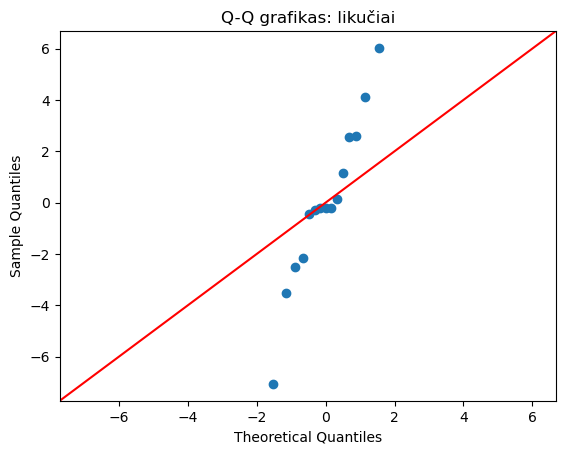

In [14]:
sm.qqplot(df["residual"], line="45")
plt.title("Q-Q grafikas: likučiai")
plt.show()

Q–Q grafikas naudojamas patikrinti, ar regresijos likučiai yra artimi normaliajam skirstiniui.

Raudona linija rodo idealų atvejį, kai likučiai pasiskirstę normaliai.
Taškai rodo realius likučių kvantilius.

Interpretacija:
jei taškai daugmaž seka tiesę, normalumo prielaida yra pagrįsta  
nedideli nukrypimai galuose yra įprasti realiuose verslo duomenyse  
stiprūs nukrypimai ar „S“ forma rodytų rimtą normalumo pažeidimą  

Šiame grafike:
dauguma taškų yra arti tiesės  
yra keli kraštiniai nukrypimai, rodantys galimas išskirtis  
bendras vaizdas rodo, kad likučių normalumo prielaida yra priimtina

Verslo prasme:
modelio koeficientai, p-reikšmės ir pasikliautiniai intervalai gali būti laikomi patikimais
nedideli nukrypimai nuo normalumo dažniausiai nėra kritiniai prognozavimo kontekste


## 11) Dažnos klaidos ir gerosios praktikos

Dažnos klaidos:
- Intercept neįtraukiamas į modelį (nepanaudojama `sm.add_constant`).
- R² interpretuojamas kaip priežastinis ryšys.
- Remiamasi vien p-value, ignoruojant efektų dydį ir verslo prasmę.
- Prognozės daromos toli už stebėto `x` intervalo (ekstrapoliacija).
- Nediagnozuojami likučiai, todėl nepastebimi prielaidų pažeidimai.

Gerosios praktikos:
- Prieš modeliavimą patikrinti ryšį vizualiai.
- Nurodyti hipotezes ir alpha, o išvadą formuluoti aiškiai.
- Vertinti tiek statistinį, tiek praktinį reikšmingumą.
- Analizuoti likučius ir, jei reikia, koreguoti modelį (transformacijos, papildomi kintamieji).
- Naudoti prognozės intervalus, kai svarbi ir rizika (neapibrėžtumas).
